# Lab 2 - Financial Mathematics

Jakub Grunas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

## Ex 1
Generate Poisson process trajectory

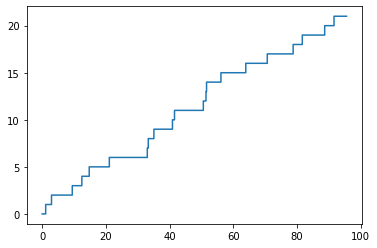

In [2]:
T = 100
lam = 5
t = 0
times = []

while t<T:
    times.append(t)
    t += np.random.exponential(lam)
    
x = []
y = []
for i in range(len(times)-1):
    x += list(np.linspace(times[i], times[i+1]))
    y += [i] * len(list(np.linspace(times[i], times[i+1])))
    
plt.plot(x,y)
plt.show()

## Ex 2
Generate Wiener process trajectory

### Implementation 1

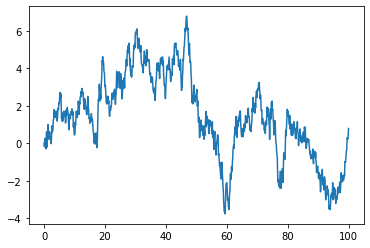

Generating time: 0.013s


In [3]:
t0 = time.time()
T = 100
ts = np.linspace(0,T,1000)
W = [0]

for i in range(1,len(ts)):
    Z = np.random.normal()
    W.append(W[-1] + np.sqrt(ts[i]-ts[i-1]) * Z)
    
tk = time.time()
    
plt.plot(ts,W)
plt.show()

print(f"Generating time: {round(tk-t0,4)}s")

### Implementation 2

In [4]:
def cholesky(S):
    n = len(S)
    L = [[0.0] * n for i in range(n)]
    for i in range(n):
        for k in range(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            if (i == k):
                L[i][k] = np.sqrt(S[i][i] - tmp_sum)
            else:
                L[i][k] = (1.0 / L[k][k] * (S[i][k] - tmp_sum))
    return L

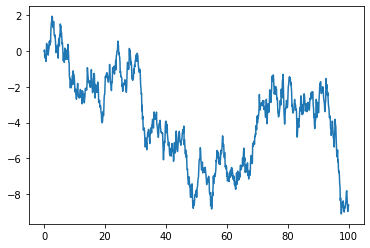

Generating time: 70.3966s


In [7]:
t0 = time.time()
T = 100
n = 1000

S = T/n * np.eye(n)
L = cholesky(S)
Z = np.random.normal(size=n)
W = np.cumsum(np.dot(L, Z))

t = np.linspace(0, T, n+1)
tk = time.time()

plt.plot(t, [0] + list(W))
plt.show()

print(f"Generating time: {round(tk-t0,4)}s")

## Ex 3
Generate 2d Wiener process trajectory

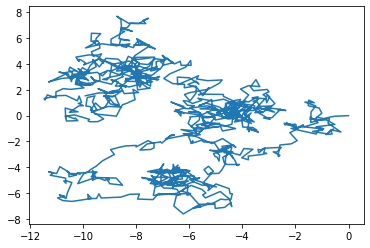

In [8]:
T = 100
ts = np.linspace(0,T,1000)
W1 = [0]

for i in range(1,len(ts)):
    Z = np.random.normal()
    W1.append(W1[-1] + np.sqrt(ts[i]-ts[i-1]) * Z)
    
    
W2 = [0]

for i in range(1,len(ts)):
    Z = np.random.normal()
    W2.append(W2[-1] + np.sqrt(ts[i]-ts[i-1]) * Z)
    
plt.plot(W1, W2)
plt.show()

## Ex 4
Generate 2d Wiener process trajectory with dependent components 

Trajectory for correlation coefficient: -0.999:


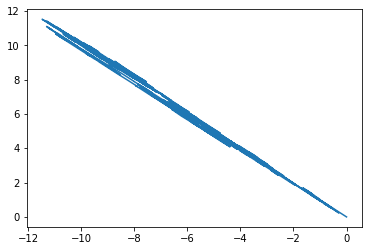

Trajectory for correlation coefficient: -0.5:


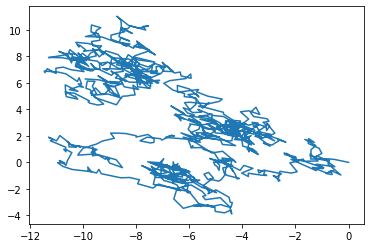

Trajectory for correlation coefficient: 0:


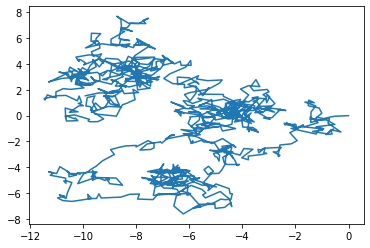

Trajectory for correlation coefficient: 0.5:


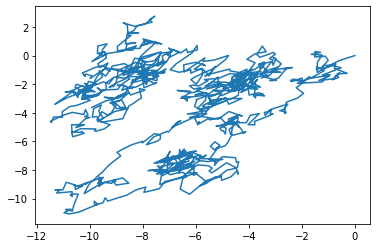

Trajectory for correlation coefficient: 0.999:


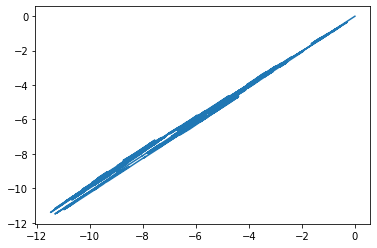

In [9]:
def two_dim_wiener(rho):
    V1 = W1.copy() # bierzemy W1 i W2 z zadania 3
    V2 = W2.copy() # roboczo
    for i in range(len(V2)):
        V2[i] = rho * W1[i] + np.sqrt(1 - rho**2) * W2[i]
    return V1,V2
    
for rho in [-0.999, -0.5, 0, 0.5, 0.999]:
    V1,V2 = two_dim_wiener(rho)
    print(f"Trajectory for correlation coefficient: {rho}:")
    plt.plot(V1,V2)
    plt.show()

## Ex 5
Illustrate different types of convergence

### with probability 1

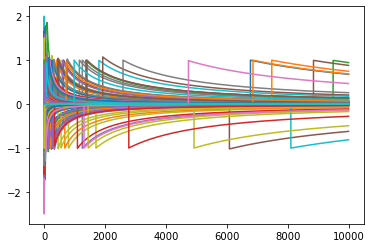

In [10]:
n_trajectories = 1000
lenght = 10000

x = np.zeros((n_trajectories, lenght))

for j in range(1,n_trajectories):
    for i in range(lenght):
        r1 = random.uniform(0,1)
        r2 = random.choice([-1, 1])
        x[j][i] = (i+1)*r2 if r1 < 1/(2*(i+1)**(3/2)) else 0 

xk = np.zeros((n_trajectories, lenght))
for i in range(n_trajectories):
    xk[i] = np.cumsum(x[i])
    
for j in range(n_trajectories):
    for i in range(1,lenght+1):
        xk[j][i-1] = xk[j][i-1]/i

plt.plot(xk.T)
plt.show()

### by probability

C:\Users\Kuba\AppData\Local\Temp\ipykernel_10320\1417892047.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  x[j][i] = (i+1)*r2 if r1 < 1/(2*(i+1)*np.log(i+1)) else 0


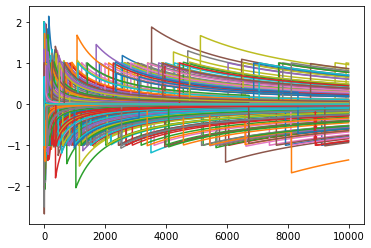

In [11]:
n_trajectories = 1000
lenght = 10000

x = np.zeros((n_trajectories, lenght))

for j in range(1,n_trajectories):
    for i in range(lenght):
        r1 = random.uniform(0,1)
        r2 = random.choice([-1, 1])
        x[j][i] = (i+1)*r2 if r1 < 1/(2*(i+1)*np.log(i+1)) else 0

xk = np.zeros((n_trajectories, lenght))
for i in range(n_trajectories):
    xk[i] = np.cumsum(x[i])
    
for j in range(n_trajectories):
    for i in range(1,lenght+1):
        xk[j][i-1] = xk[j][i-1]/i

plt.plot(xk.T)
plt.show()

### no convergence

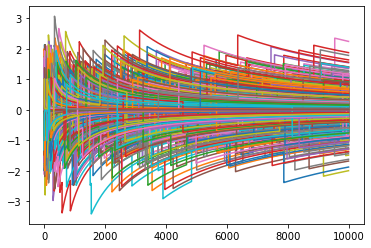

In [12]:
n_trajectories = 1000
lenght = 10000

x = np.zeros((n_trajectories, lenght))

for j in range(1,n_trajectories):
    for i in range(lenght):
        r1 = random.uniform(0,1)
        r2 = random.choice([-1, 1])
        x[j][i] = (i+1)*r2 if r1 < 1/(2*(i+1)) else 0

xk = np.zeros((n_trajectories, lenght))
for i in range(n_trajectories):
    xk[i] = np.cumsum(x[i])
    
for j in range(n_trajectories):
    for i in range(1,lenght+1):
        xk[j][i-1] = xk[j][i-1]/i

plt.plot(xk.T)
plt.show()

## Ex 6
Verify empirically Law of the iterated logarithm 

C:\Users\Kuba\AppData\Local\Temp\ipykernel_10320\2782435783.py:14: RuntimeWarning: divide by zero encountered in log
  f1 = np.sqrt(2*ts*np.log(np.log(ts)))
C:\Users\Kuba\AppData\Local\Temp\ipykernel_10320\2782435783.py:14: RuntimeWarning: invalid value encountered in log
  f1 = np.sqrt(2*ts*np.log(np.log(ts)))
C:\Users\Kuba\AppData\Local\Temp\ipykernel_10320\2782435783.py:14: RuntimeWarning: invalid value encountered in sqrt
  f1 = np.sqrt(2*ts*np.log(np.log(ts)))


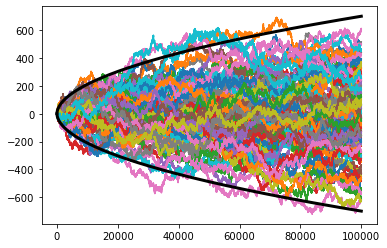

In [13]:
Ws = []

for i in range(100):
    T = 100000
    ts = np.linspace(0,T,100000)
    W = [0]

    for i in range(1,len(ts)):
        Z = np.random.normal()
        W.append(W[-1] + np.sqrt(ts[i]-ts[i-1]) * Z)
    
    Ws.append(W)

f1 = np.sqrt(2*ts*np.log(np.log(ts)))
f2=-f1
for i in range(len(Ws)):
    plt.plot(ts,Ws[i])
plt.plot(ts,f1, color='black', lw=3)
plt.plot(ts,f2, color='black', lw=3)
plt.show()